# Задание

# Ход работы

## Импортируем библиотеки

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.metrics import accuracy_score

## Получаем данные из файла


In [28]:
data = pd.read_csv("WineDataset.csv")
data.describe()

,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


## Чистка данных
Проверяем на пустые строки и пропущенные значения.
Перемешаем данные

In [29]:
missing_values = data.isnull().sum()
print("Missing values per column:", missing_values, sep="\n")
rows_to_delete = data.isnull().any(axis=1).sum()
data = data.dropna()
print("Deleted rows:", rows_to_delete)
data = data.sample(frac=1, random_state=3).reset_index(drop=True)

Missing values per column:
Alcohol                         0
Malic Acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
Wine                            0
dtype: int64
Deleted rows: 0


## Визуализация данных

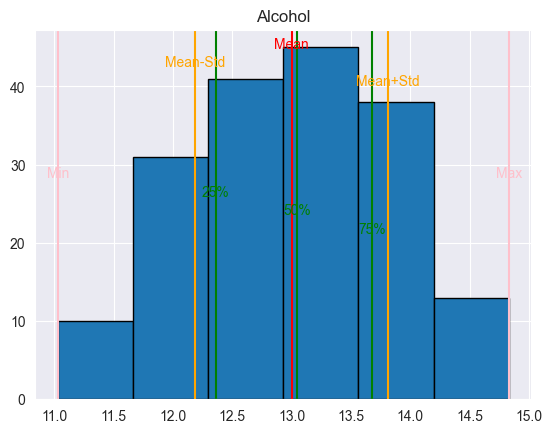

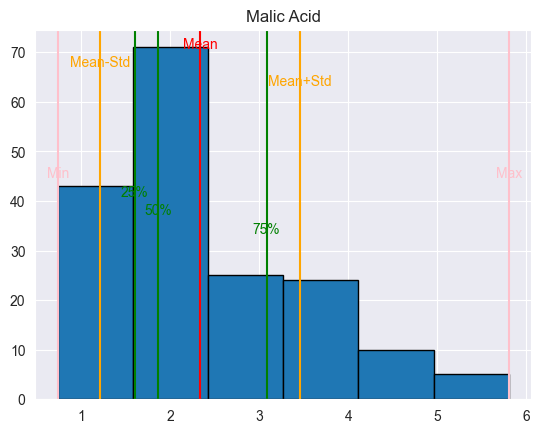

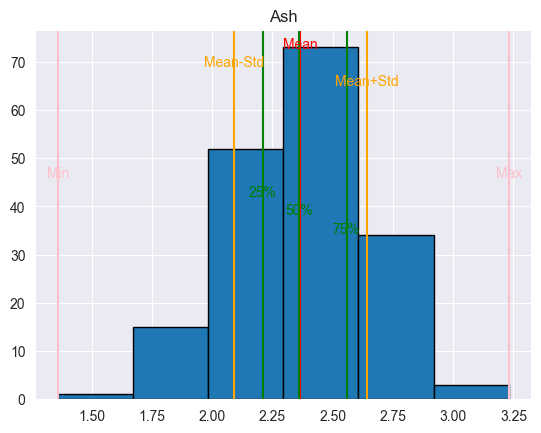

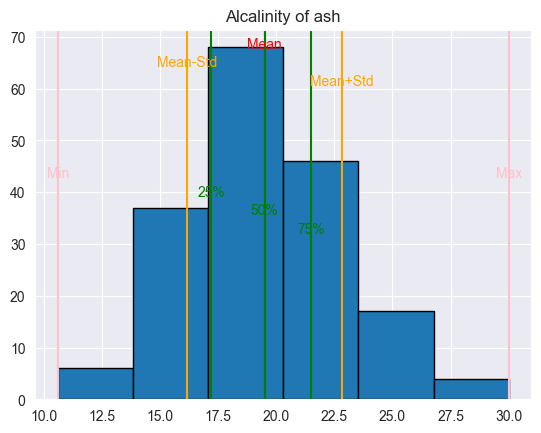

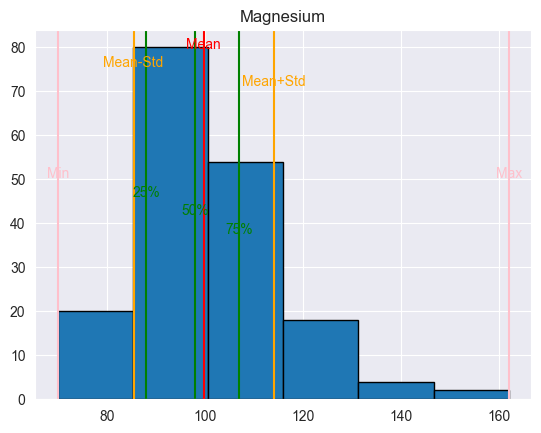

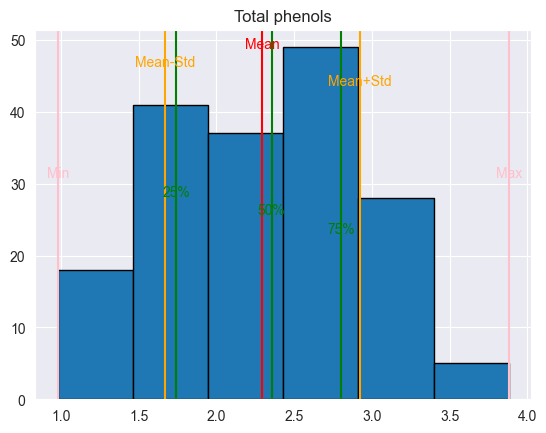

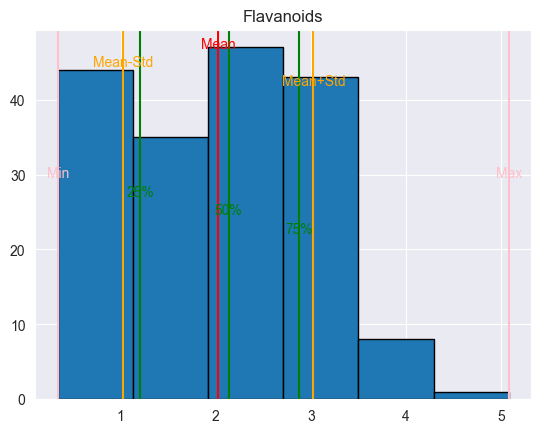

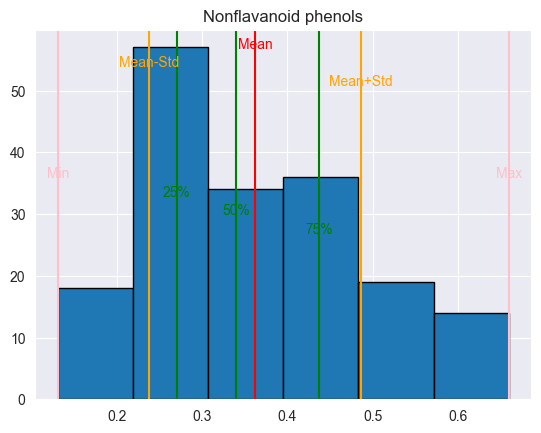

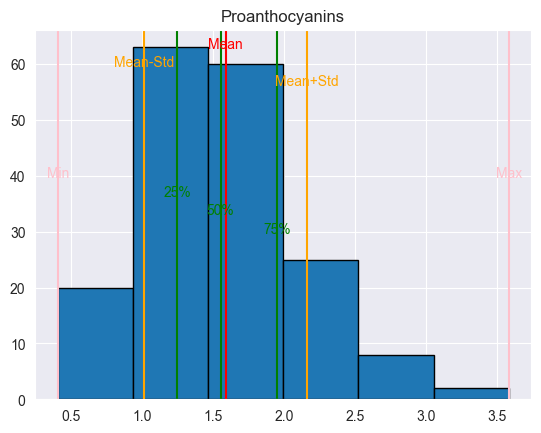

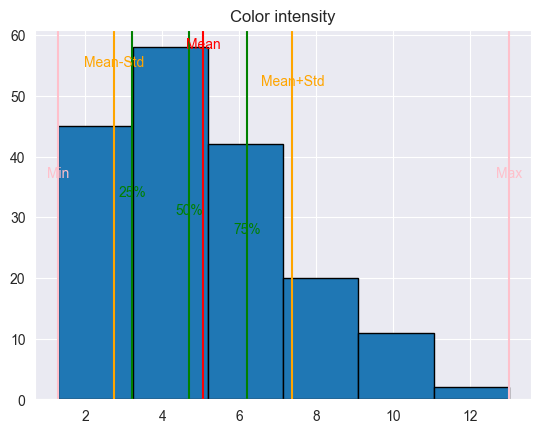

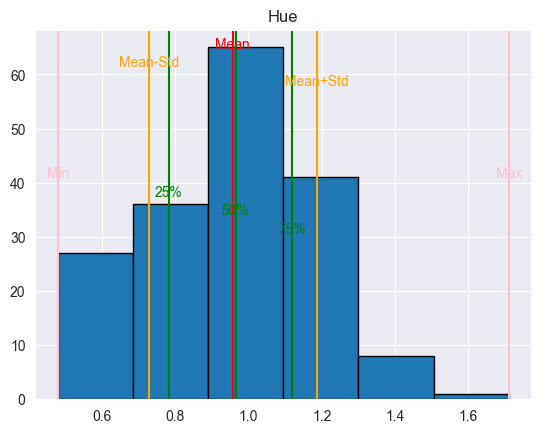

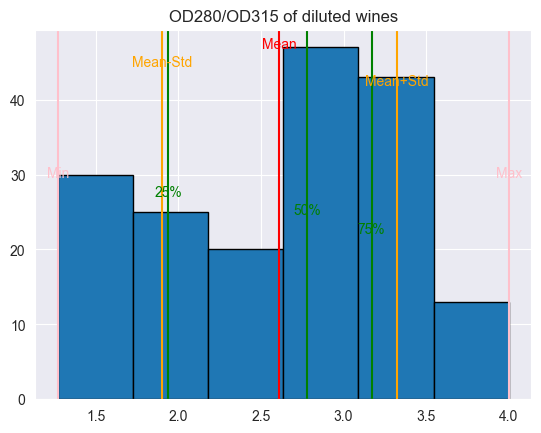

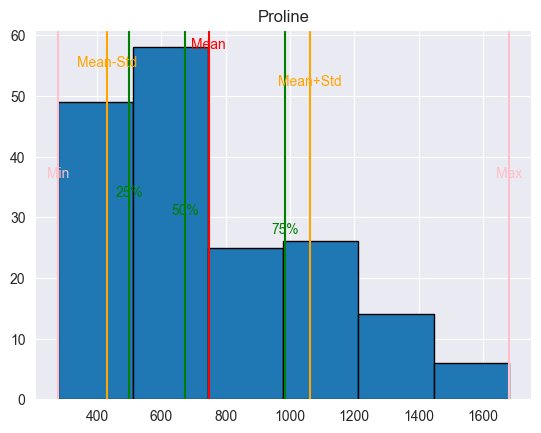

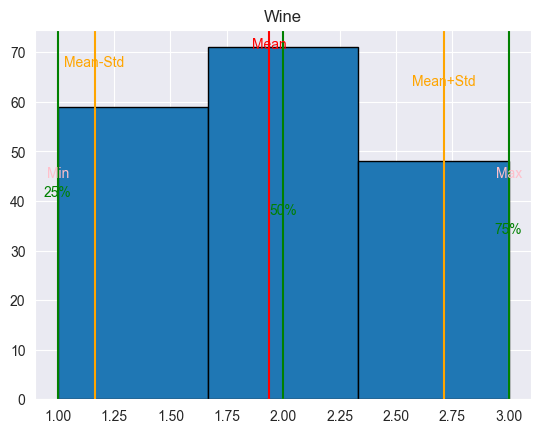

In [30]:
description = data.describe()
bins_count = 1 + int(math.log(description[description.columns[0]]["count"]))
for column in description.columns:
    plt.figure()
    
    if column == "Wine":
        data[column].hist(bins=3, edgecolor="black")
    else:
        data[column].hist(bins=bins_count, edgecolor="black")
    
    mean = description[column]["mean"]
    std = description[column]["std"]
    min_value = description[column]["min"]
    p25 = description[column]["25%"]
    p50 = description[column]["50%"]
    p75 = description[column]["75%"]
    max_value = description[column]["max"]
    
    plt.title(column)
    
    plt.axvline(mean, color="red")
    plt.text(mean, plt.ylim()[1]*0.95, "Mean", ha="center", color="red")
    
    plt.axvline(mean-std, color="orange")
    plt.text(mean-std, plt.ylim()[1]*0.9, "Mean-Std", ha="center", color="orange")
    plt.axvline(mean+std, color="orange")
    plt.text(mean+std, plt.ylim()[1]*0.85, "Mean+Std", ha="center", color="orange")
    
    plt.axvline(min_value, color="pink")
    plt.text(min_value, plt.ylim()[1]*0.6, "Min", ha="center", color="pink")
    plt.axvline(max_value, color="pink")
    plt.text(max_value, plt.ylim()[1]*0.6, "Max", ha="center", color="pink")
    
    plt.axvline(p25, color="green")
    plt.text(p25, plt.ylim()[1]*0.55, "25%", ha="center", color="green")
    plt.axvline(p50, color="green")
    plt.text(p50, plt.ylim()[1]*0.5, "50%", ha="center", color="green")
    plt.axvline(p75, color="green")
    plt.text(p75, plt.ylim()[1]*0.45, "75%", ha="center", color="green")
    
    plt.show()

### Корреляционная матрица

Correlation matrix:
                              Alcohol  Malic Acid   Ash  Alcalinity of ash  \
Alcohol                          1.00        0.09  0.21              -0.31   
Malic Acid                       0.09        1.00  0.16               0.29   
Ash                              0.21        0.16  1.00               0.44   
Alcalinity of ash               -0.31        0.29  0.44               1.00   
Magnesium                        0.27       -0.05  0.29              -0.08   
Total phenols                    0.29       -0.34  0.13              -0.32   
Flavanoids                       0.24       -0.41  0.12              -0.35   
Nonflavanoid phenols            -0.16        0.29  0.19               0.36   
Proanthocyanins                  0.14       -0.22  0.01              -0.20   
Color intensity                  0.55        0.25  0.26               0.02   
Hue                             -0.07       -0.56 -0.07              -0.27   
OD280/OD315 of diluted wines     0.07       

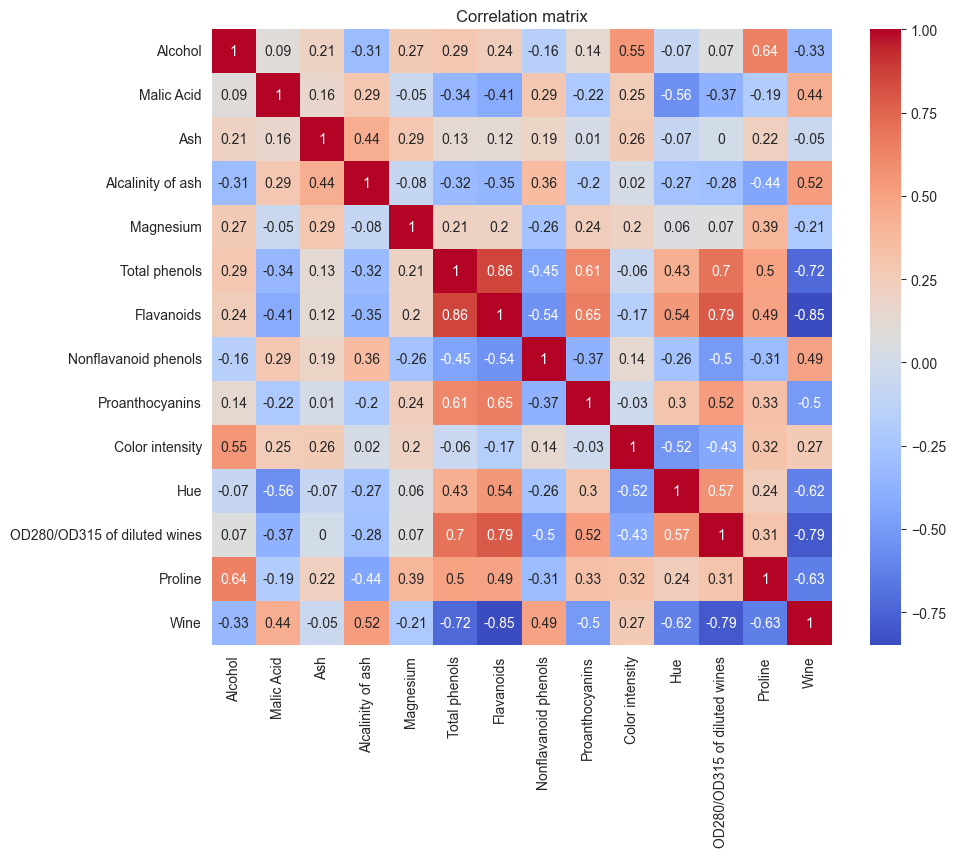

In [31]:
correlation_matrix = data.corr().round(2)
print("Correlation matrix:", correlation_matrix, sep="\n")

plt.figure(figsize=(10, 8))  # Увеличиваем размер графика
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

## 3D-визуализация

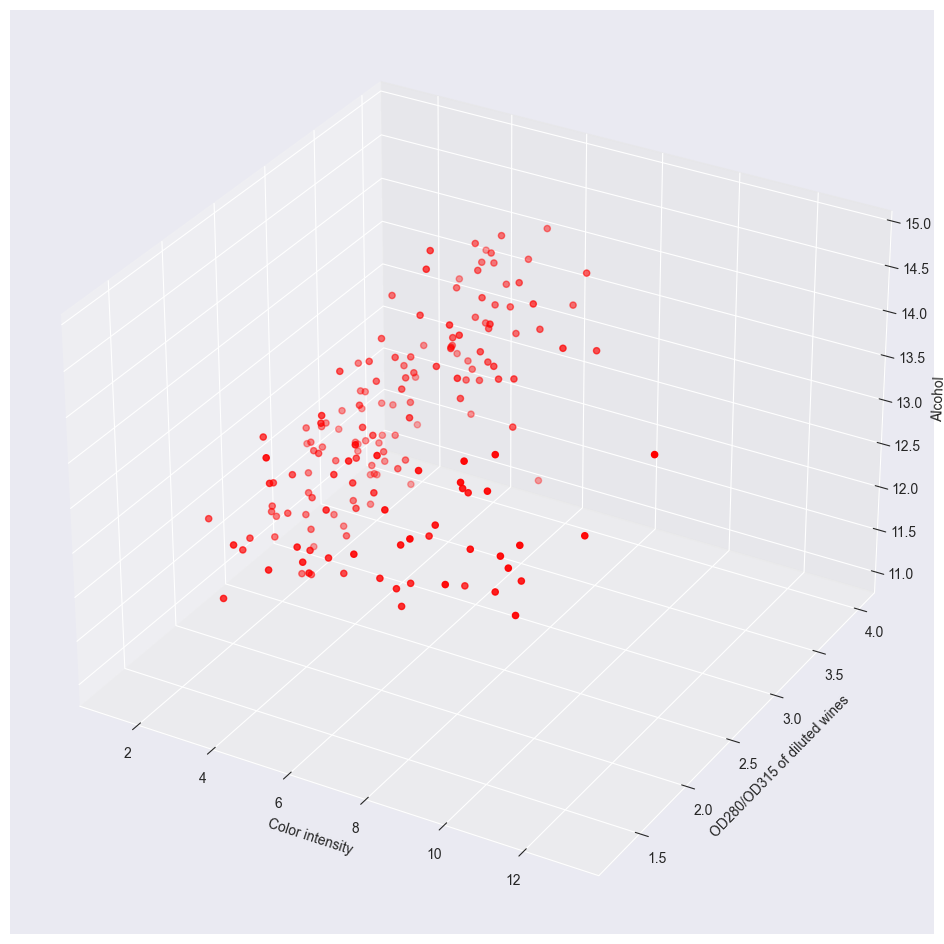

In [32]:
np.random.seed(42)
random_columns = np.random.choice(data.columns, size=3, replace=False)
x = data[random_columns[0]]
y = data[random_columns[1]]
z = data[random_columns[2]]

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel(random_columns[0])
ax.set_ylabel(random_columns[1])
ax.set_zlabel(random_columns[2])

plt.show()

## Нормирование данных

In [33]:
data_norm = (data - data.mean()) / data.std()
print(data_norm)

      Alcohol  Malic Acid       Ash  Alcalinity of ash  Magnesium  \
0    0.689041   -0.560668 -0.206007          -0.986639   1.208363   
1    0.947717   -0.390592  1.142664          -0.717143   1.068331   
2    0.627452   -0.480106  1.033313          -0.148206   0.718252   
3   -1.712950   -0.882918  1.215566           0.151234  -0.402001   
4    0.590498   -0.596474  0.996862           0.899835  -0.752080   
..        ...         ...       ...                ...        ...   
173 -0.086987    1.310170  1.033313          -0.267982   0.158126   
174  1.514341   -0.560668  0.231400          -1.166303   1.908522   
175 -0.148576    0.585109  0.122048           0.151234   0.298157   
176  0.134736   -0.390592  1.397819           1.798156   1.138347   
177 -0.924604   -0.542765 -0.898568          -0.148206  -1.382223   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0         1.365960    1.262171             -0.175599         1.308796   
1         1.126287    0.7

## Выделяем обучающие и тестовые данные
В качестве скрытого параметра выступит оценка вина (Wine).
85% данных для обучения и 15% для тестов

In [34]:
X = data_norm.drop(columns=["Wine"])
y = data["Wine"]

train_size = int(X.shape[0] * 0.85)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(151, 13) (27, 13) (151,) (27,)


## Метод k-ближайших соседей

In [35]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def k_nearest_neighbors(train_x, train_y, test_point, k):
    train_x = np.array(train_x)
    train_y = np.array(train_y)
    
    distances = []
    for i in range(len(train_x)):
        distance = euclidean_distance(train_x[i], test_point)
        distances.append((distance, train_y[i]))
    
    nearest_y = [value for _, value in sorted(distances, key=lambda x: x[0])[:k]]
    most_often = np.bincount(nearest_y).argmax()
    
    return most_often

## Модель 1. Случайные признаки

In [37]:
random_features = X_train.sample(n=4, axis=1, random_state=3)
X_test_random = X_test[random_features.columns]

print("Random features:", random_features.columns)

for k in [3, 5, 10]:
    y_pred = [k_nearest_neighbors(random_features.values, y_train.values, test_point, k) for test_point in X_test_random.values]
    
    confusion = np.zeros((3, 3), dtype=int)
    for actual, predicted in zip(y_test, y_pred):
        confusion[int(actual)-1, int(predicted)-1] += 1
        
    print(f"Confusion matrix for k={k}:")
    print(confusion)
    print(accuracy_score(y_test, y_pred))

Random features: Index(['Flavanoids', 'Magnesium', 'Malic Acid', 'Ash'], dtype='object')
Confusion matrix for k=3:
[[ 3  1  0]
 [ 1 11  1]
 [ 0  0 10]]
0.8888888888888888
Confusion matrix for k=5:
[[ 4  0  0]
 [ 2 10  1]
 [ 0  0 10]]
0.8888888888888888
Confusion matrix for k=10:
[[ 3  1  0]
 [ 1 11  1]
 [ 1  0  9]]
0.8518518518518519


## Модель 2. Заранее заданные признаки

In [38]:
fixed_features = X_train[['Malic Acid', 'Color intensity', 'Proline']]
X_test_fixed = X_test[['Malic Acid', 'Color intensity', 'Proline']]

print("Fixed features:", fixed_features.columns)
for k in [3, 5, 10]:
    y_pred = [k_nearest_neighbors(fixed_features.values, y_train.values, test_point, k) for test_point in X_test_fixed.values]
    
    confusion = np.zeros((3, 3), dtype=int)
    for actual, predicted in zip(y_test, y_pred):
        confusion[int(actual)-1, int(predicted)-1] += 1
        
    print(f"Confusion matrix for k={k}:")
    print(confusion)
    print(accuracy_score(y_test, y_pred))

Fixed features: Index(['Malic Acid', 'Color intensity', 'Proline'], dtype='object')
Confusion matrix for k=3:
[[ 4  0  0]
 [ 1 12  0]
 [ 0  1  9]]
0.9259259259259259
Confusion matrix for k=5:
[[ 3  0  1]
 [ 1 12  0]
 [ 0  0 10]]
0.9259259259259259
Confusion matrix for k=10:
[[ 3  0  1]
 [ 0 13  0]
 [ 0  0 10]]
0.9629629629629629
